# Data Mining pipeline
## Fecha
- Marzo 10, 2021

## Integrantes
- **Christian Berdejo Sánchez**
- **Pablo Nieto Rodriguez**
- **Tarek Rababy López**


## Dataset
- [Estimation of Obesity Levels Based On Eating Habits and Physical Condition](https://archive.ics.uci.edu/datasets?skip=0&take=10&sort=desc&orderBy=NumHits&search=)




## Instalar dependencias en el entorno virtual

In [ ]:

#En caso de usar jupiter ejecutar, google colab ya contiene estas librerías
%pip install scikit-learn
%pip install matplotlib
%pip install pandas


In [1]:
#Esta dependencia tampoco la tiene google colab, debe ejecutarse siempre (Repositorio de datasets UCI)
%pip install ucimlrepo
%pip install  ydata-profiling



  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 392.1/392.1 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 87.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=312586a3b5c9a43f4fdcf15a86a583ea19dfc217fb5b37dd9bf3aebcdcf2e9ed
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


## Importamos Dataset

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544)

df_X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features
df_y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets



In [5]:
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.metadata)

print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.variables)



{'uci_id': 544, 'name': 'Estimation of Obesity Levels Based On Eating Habits and Physical Condition ', 'repository_url': 'https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition', 'data_url': 'https://archive.ics.uci.edu/static/public/544/data.csv', 'abstract': 'This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. ', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 2111, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': ['Gender', 'Age'], 'target_col': ['NObeyesdad'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Tue Sep 10 2024', 'dataset_doi': '10.24432/C5H31Z', 'creators': [], 'intro_paper': {'ID': 358, 'type': 

**Descripción del Dataset**

Este dataset incluye datos para la estimación de los niveles de obesidad , basándose en sus hábitos alimenticios y su condición física. Contiene un total de 2111 registros con 16 características, y la variable objetivo es NObeyesdad, que indica el nivel de obesidad.



## Preprocesamiento de datos


Los datos que son catégoricos deben sustituirse por valores númericos.
Estos son los datos categóricos y sus opciones. Además hay que tener en cuenta CAEC Y CALC son ordinales y no se puede pueder esa información.
- Gender (Male, Female)
- family_history_with_overweight (yes, no)
- FAVC (yes, no)
- CAEC (no,Sometimes, Frequently, Always)
- SMOKE (yes, no)
- SCC (yes, no)
- CALC (no,Sometimes, Frequently, Always)
- MTRANS (Public_Transportation, Walking, etc.)

Vamos a intentar predecir el tipo obesidad según el resto de parámetros
- NObeyesdad (Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, and Obesity Type III
)

In [6]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder


# Unimos features y target en un solo DataFrame para transformaciones
df = pd.concat([df_X, df_y], axis=1)

# Definir columnas categóricas ordenadas (Ordinal)
ordinal_cols = {
    "CAEC": ["no", "Sometimes", "Frequently", "Always"],  # Consumo entre comidas
    "CALC": ["no", "Sometimes", "Frequently", "Always"],  # Consumo de alcohol
}

# Aplicar OrdinalEncoder con los valores en orden correcto
ordinal_encoder = OrdinalEncoder(categories=[ordinal_cols[col] for col in ordinal_cols])
df[list(ordinal_cols.keys())] = ordinal_encoder.fit_transform(df[list(ordinal_cols.keys())])

# Guardar el mapeo de valores originales a numéricos para ordinales (los vamos a mostrar luego)
ordinal_mappings = {
    col: {category: index for index, category in enumerate(ordinal_cols[col])}
    for col in ordinal_cols
}

# Definir columnas nominales (OneHotEncoder)
nominal_cols = ["Gender", "family_history_with_overweight", "FAVC", "SMOKE", "SCC", "MTRANS"]

# Aplicar OneHotEncoder a variables nominales
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = one_hot_encoder.fit_transform(df[nominal_cols])

# Crear un DataFrame con las columnas transformadas
encoded_df = pd.DataFrame(encoded_features, columns=one_hot_encoder.get_feature_names_out(nominal_cols))

# Aplicar LabelEncoder para la variable objetivo (NObeyesdad)
label_encoder = LabelEncoder()
df["NObeyesdad"] = label_encoder.fit_transform(df["NObeyesdad"])

# Guardar el mapeo de clases de la variable objetivo con su número (Para mostrarlas luego)
target_mapping = {category: index for index, category in enumerate(label_encoder.classes_)}

# Guardar mapeo de OneHotEncoding (para variables nominales)
one_hot_mappings = {}
for col, categories in zip(nominal_cols, one_hot_encoder.categories_):
    one_hot_mappings[col] = {category: i for i, category in enumerate(categories) if category != categories[0]}

# Concatenar las variables codificadas con las numéricas originales
df = df.drop(columns=nominal_cols).reset_index(drop=True)
df = pd.concat([df, encoded_df], axis=1)



# Mostrar el dataset transformado
df



,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,NObeyesdad,Gender_Male,family_history_with_overweight_yes,FAVC_yes,SMOKE_yes,SCC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.000000,1.620000,64.000000,2.0,3.0,1.0,2.000000,0.000000,1.000000,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,21.000000,1.520000,56.000000,3.0,3.0,1.0,3.000000,3.000000,0.000000,1.0,1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,23.000000,1.800000,77.000000,2.0,3.0,1.0,2.000000,2.000000,1.000000,2.0,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,27.000000,1.800000,87.000000,3.0,3.0,1.0,2.000000,2.000000,0.000000,2.0,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,22.000000,1.780000,89.800000,2.0,1.0,1.0,2.000000,0.000000,0.000000,1.0,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.0,1.728139,1.676269,0.906247,1.0,4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2107,21.982942,1.748584,133.742943,3.0,3.0,1.0,2.005130,1.341390,0.599270,1.0,4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2108,22.524036,1.752206,133.689352,3.0,3.0,1.0,2.054193,1.414209,0.646288,1.0,4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2109,24.361936,1.739450,133.346641,3.0,3.0,1.0,2.852339,1.139107,0.586035,1.0,4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### Atención:
Cuando aplicamos One-Hot Encoding, cada categoría se convierte en una nueva columna con valores binarios (0 o 1). Por ejemplo Gender pasaría a ser Gender_female y Gender_male. Sin embargo, esto es redundante ya que si sabemos los valores de todas las columnas menos una, podemos deducir el valor de la que falta. Podemos utilizar drop=first para evitar este problema y obtenemos algo así:

#### Tabla Original (Categoría Gender)
<table>
    <tr>
        <th>Gender</th>
    </tr>
    <tr>
        <td>Female</td>
    </tr>
    <tr>
        <td>Male</td>
    </tr>
</table>

#### OneHotEncoder sin drop='first' (Todas las categorías)
<table>
    <tr>
        <th>Gender</th>
        <th>Gender_Female</th>
        <th>Gender_Male</th>
    </tr>
    <tr>
        <td>Female</td>
        <td>1</td>
        <td>0</td>
    </tr>
    <tr>
        <td>Male</td>
        <td>0</td>
        <td>1</td>
    </tr>
</table>

#### OneHotEncoder con drop='first' (Se elimina una categoría)
<table>
    <tr>
        <th>Gender_Male</th>
    </tr>
    <tr>
        <td>0</td>
    </tr>
    <tr>
        <td>1</td>
    </tr>
</table>




In [7]:
# Imprimir mapeo completo
feature_mappings = {**ordinal_mappings, **one_hot_mappings, "NObeyesdad": target_mapping}

print("Resultado del mapeo Completo de Variables Categóricas:")
for feature, mapping in feature_mappings.items():
    print(f"{feature}: {mapping}")

Resultado del mapeo Completo de Variables Categóricas:
CAEC: {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
CALC: {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
Gender: {'Male': 1}
family_history_with_overweight: {'yes': 1}
FAVC: {'yes': 1}
SMOKE: {'yes': 1}
SCC: {'yes': 1}
MTRANS: {'Bike': 1, 'Motorbike': 2, 'Public_Transportation': 3, 'Walking': 4}
NObeyesdad: {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6}


### Informe
Podemos visualzar un informe sobre el dataframe resultante del dataset.
- Como vemos no tenemos ningún valor vacío.
- Usando el informe se puede mirar el balance de los datos.
- Vemos muchos valores en el dataset con el valor 0, esto se debe a la codificación de las variables categóricas para que sean valores númericos.


In [ ]:
from ydata_profiling import ProfileReport
report = ProfileReport(df, title="profiling", correlations={"auto": {"calculate": True}}, minimal=True)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Obtenemos X e Y

In [8]:
# Obtenemos la X y la y
X = df.drop(columns=['NObeyesdad']).values # Features
y = df['NObeyesdad'].values  # Target


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
test_size = 0.2
random_state = 42

# Dividimos en conjunto de entrenamiento y conjunto de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)




## Estudio de clasificación

La función model_analysis permite entrenar y evaluar modelos de clasificación de manera automatizada utilizando búsqueda por rejilla (GridSearchCV) y validación cruzada.
1.  Primero, explora el conjunto de datos, mostrando información sobre el número de muestras, características y clases únicas.
2.  Divide los datos en conjuntos de entrenamiento y prueba, aplicando opcionalmente normalización (StandardScaler) si se especifica.
3.  A continuación, realiza una búsqueda de hiperparámetros usando GridSearchCV, optimizando el modelo en base a una métrica definida (scoring).
4. Una vez encontrado el mejor modelo, se evalúa en el conjunto de prueba, calculando la precisión (accuracy_score) y mostrando una matriz de confusión, y metrícas para analizar su desempeño.
5. Finalmente, la función devuelve el mejor modelo encontrado.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, LeaveOneOut
from sklearn.metrics import (classification_report, accuracy_score, precision_score,
                            recall_score, f1_score, roc_auc_score, roc_curve,
                            confusion_matrix, ConfusionMatrixDisplay,
                            precision_recall_curve, auc, mean_absolute_error,
                            mean_squared_error, r2_score)
from sklearn.base import is_classifier, is_regressor
import seaborn as sns
from sklearn.pipeline import Pipeline



def model_analysis(model, param_grid,  scoring='accuracy', cv_folds=5,  leave_one_out=False):

    # **1. Exploración del Dataset**
    print(f"Vista general del dataset:")
    print(f" - Número de muestras: {X.shape[0]}")
    print(f" - Número de características: {X.shape[1]}")
    print(f" - Clases únicas: {np.unique(y)}\n")
    num_classes = len(np.unique(y))


    # **2. Estrategia de Validación Cruzada**
    cv_strategy = LeaveOneOut() if leave_one_out else cv_folds

    ## **3. Pipeline

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    # **4. Búsqueda por Rejilla con Validación Cruzada**
    grid_search = GridSearchCV(pipeline, param_grid, scoring=scoring, cv=cv_strategy, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    print("\nResultados de búsqueda por rejilla y validación cruzada:")
    print(" - Mejores parámetros encontrados:", grid_search.best_params_)
    print(" - Mejor precisión en validación cruzada: {:.4f}".format(grid_search.best_score_))

    # **5 Evaluación del modelo en el conjunto de prueba**
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)


   # **6. Detectar si el modelo es un clasificador o regresor y mostrar métricas**
    if is_classifier(best_model):

        #Variables
        print("\n--- Evaluación para Clasificación ---")
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        print(f"- Accuracy: {accuracy:.4f}")
        print(f"- Precision: {precision:.4f}")
        print(f"- Recall: {recall:.4f}")
        print(f"- F1-score: {f1:.4f}")


        #  Matriz de Confusión**
        print("\nMatriz de Confusión:")
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(cm)
        disp.plot()
        plt.show()



    elif is_regressor(best_model):
        print("\n--- Evaluación para Regresión ---")
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        print(f"- MAE (Error Absoluto Medio): {mae:.4f}")
        print(f"- MSE (Error Cuadrático Medio): {mse:.4f}")
        print(f"- RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")
        print(f"- R² (Coeficiente de Determinación): {r2:.4f}")

        # **8. Gráfico de dispersión Predicción vs Real**
        plt.figure(figsize=(6, 5))
        plt.scatter(y_test, y_pred, alpha=0.5)
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')  # Línea ideal
        plt.xlabel("Valores Reales")
        plt.ylabel("Predicciones")
        plt.title("Predicción vs Valor Real")
        plt.show()

      #Aquí Sería inter

    return best_model.named_steps['model']  # Devolvemos el mejor modelo encontrado


### Estrategia de Validación Cruzada

Para evaluar el rendimiento de los modelos y seleccionar los hiperparámetros óptimos, se emplearon las siguientes estrategias de validación cruzada:

1. **K-Fold Cross-Validation:** Esta técnica divide el conjunto de datos en 'k' subconjuntos (folds). En cada iteración, uno de los subconjuntos se utiliza como conjunto de validación y los 'k-1' restantes como conjunto de entrenamiento. Este proceso se repite 'k' veces, asegurando que cada muestra se utilice para validación una vez. Es útil para obtener estimaciones robustas del rendimiento del modelo y es eficiente en términos computacionales.

2. **Leave-One-Out Cross-Validation (LOOCV):** LOOCV es un caso particular de K-Fold donde 'k' es igual al número de muestras. En cada iteración, se utiliza una única muestra para validación y el resto para entrenamiento. Aunque proporciona una evaluación exhaustiva, puede ser computacionalmente costoso para conjuntos de datos grandes. Se emplea cuando se dispone de un número limitado de muestras y se busca maximizar el uso de los datos para el entrenamiento.

### Interpretar datos de Matriz de confusión
La matriz de confusión es una tabla que permite visualizar el desempeño de un modelo de clasificación, comparando las predicciones del modelo con los valores reales.

Cada celda de la matriz representa un conteo de predicciones y se estructura de la siguiente manera:
<table>
        <tr>
            <th>Clase Real / Predicción</th>
            <th>Predicho Positivo (1)</th>
            <th>Predicho Negativo (0)</th>
        </tr>
        <tr>
            <th>Real Positivo (1)</th>
            <td >Verdaderos Positivos (TP)</td>
            <td>Falsos Negativos (FN)</td>
        </tr>
        <tr>
            <th>Real Sano (0)</th>
            <td >Falsos Positivos (FP)</td>
            <td>Verdaderos Negativos (TN)</td>
        </tr>
</table>

Por lo que cuanto mas valores en la diagonal que va de la esquina superior izquierda a la esquina superior derecha, mas preciso el modelo.

### KNN Clasification
KNN es un algoritmo sencillo y versátil que clasifica una instancia basándose en las clases de sus 'k' vecinos más cercanos en el espacio de características. Como primera iteración, es útil para empezar a ver resultados.

**Hiperparámetros**
-  n_neighbors: Número de vecinos a considerar (valores probados: 3, 5, 7, 9, 11).
- weights: Función de ponderación utilizada en la predicción ('uniform', 'distance').
- metric: Métrica de distancia utilizada ('euclidean', 'cosine', 'manhattan').

**Sesgo y Varianza**
- Sesgo: Con un número pequeño de vecinos ('k'), el modelo puede tener baja sesgo, adaptándose estrechamente al conjunto de entrenamiento.
- Varianza: Un 'k' pequeño puede llevar a alta varianza debido a la sensibilidad al ruido.


Vista general del dataset:
 - Número de muestras: 2111
 - Número de características: 19
 - Clases únicas: [0 1 2 3 4 5 6]


Resultados de búsqueda por rejilla y validación cruzada:
 - Mejores parámetros encontrados: {'model__metric': 'manhattan', 'model__n_neighbors': 3, 'model__weights': 'distance'}
 - Mejor precisión en validación cruzada: 0.8703

--- Evaluación para Clasificación ---
- Accuracy: 0.8818
- Precision: 0.8806
- Recall: 0.8818
- F1-score: 0.8802

Matriz de Confusión:


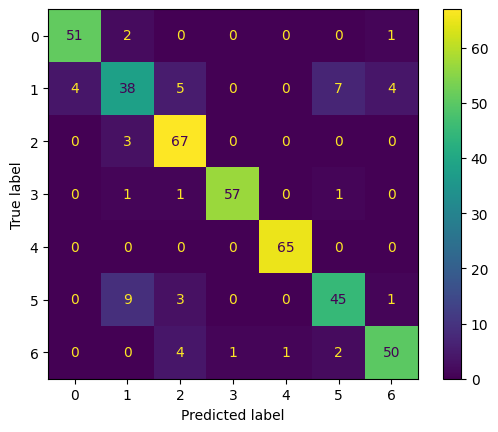

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


#Búsqueda por rejilla

rejilla = {'model__n_neighbors':[3,5,7,9,11],'model__weights':['uniform','distance'],'model__metric':['euclidean','cosine','manhattan']}

modelo_knn = model_analysis(KNeighborsClassifier(), rejilla)



Vista general del dataset:
 - Número de muestras: 2111
 - Número de características: 19
 - Clases únicas: [0 1 2 3 4 5 6]


Resultados de búsqueda por rejilla y validación cruzada:
 - Mejores parámetros encontrados: {'model__metric': 'manhattan', 'model__n_neighbors': 5, 'model__weights': 'distance'}
 - Mejor precisión en validación cruzada: 0.8738

--- Evaluación para Clasificación ---
- Accuracy: 0.8629
- Precision: 0.8611
- Recall: 0.8629
- F1-score: 0.8610

Matriz de Confusión:


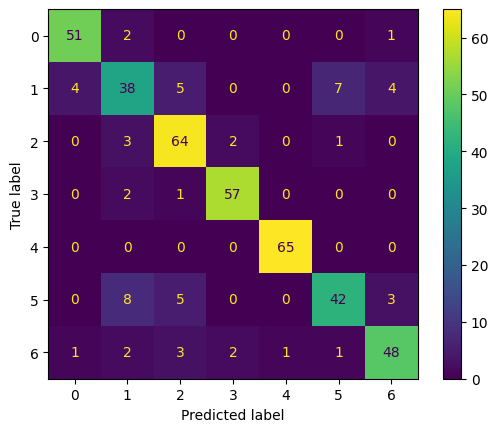

In [ ]:
modelo_knn_leave_one_out = model_analysis(KNeighborsClassifier(), rejilla,  leave_one_out=True)


### Árbol de decisión
Los árboles de decisión son modelos interpretables que dividen los datos en subconjuntos basados en valores de las características, facilitando la comprensión de las decisiones del modelo. Son efectivos para capturar relaciones no lineales y manejar tanto variables categóricas como continuas.

**Hiperparámetros**
- criterion: Función para medir la calidad de una división ('gini', 'entropy', 'log_loss').
- max_depth: Profundidad máxima del árbol (valores probados: 3, 5, 7).
- min_samples_split: Número mínimo de muestras requeridas para dividir un nodo (valores probados: 2, 4, 8, 16).

**Sesgo y Varianza**
- Sesgo: Puede tener bajo sesgo si se permite que el árbol crezca sin restricciones, capturando complejidades del conjunto de entrenamiento.
- Varianza: Un árbol sin restricciones puede **sobreajustarse**, mostrando alta varianza. La poda del árbol o la limitación de su profundidad ayudan a controlar este aspecto (El hiperparámetro max_depth se encarga de limitarlo).

Vista general del dataset:
 - Número de muestras: 2111
 - Número de características: 19
 - Clases únicas: [0 1 2 3 4 5 6]


Resultados de búsqueda por rejilla y validación cruzada:
 - Mejores parámetros encontrados: {'model__criterion': 'entropy', 'model__max_depth': 7, 'model__min_samples_split': 4}
 - Mejor precisión en validación cruzada: 0.9236

--- Evaluación para Clasificación ---
- Accuracy: 0.9338
- Precision: 0.9349
- Recall: 0.9338
- F1-score: 0.9340

Matriz de Confusión:


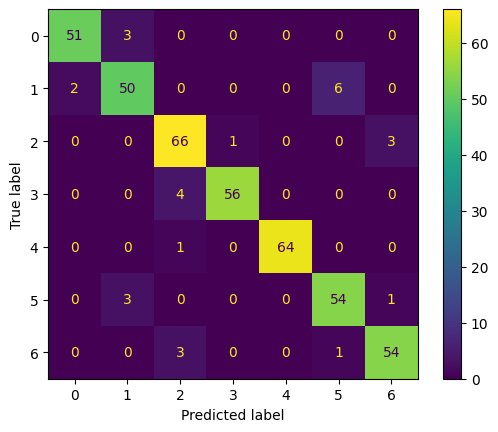

In [19]:
from sklearn.tree import DecisionTreeClassifier

#Búsqueda por rejilla

rejilla = {'model__criterion':['gini','entropy','log_loss'], 'model__max_depth':[3,5,7], 'model__min_samples_split':[2,4,8,16]}

modelo_dtc = model_analysis(DecisionTreeClassifier(), rejilla)


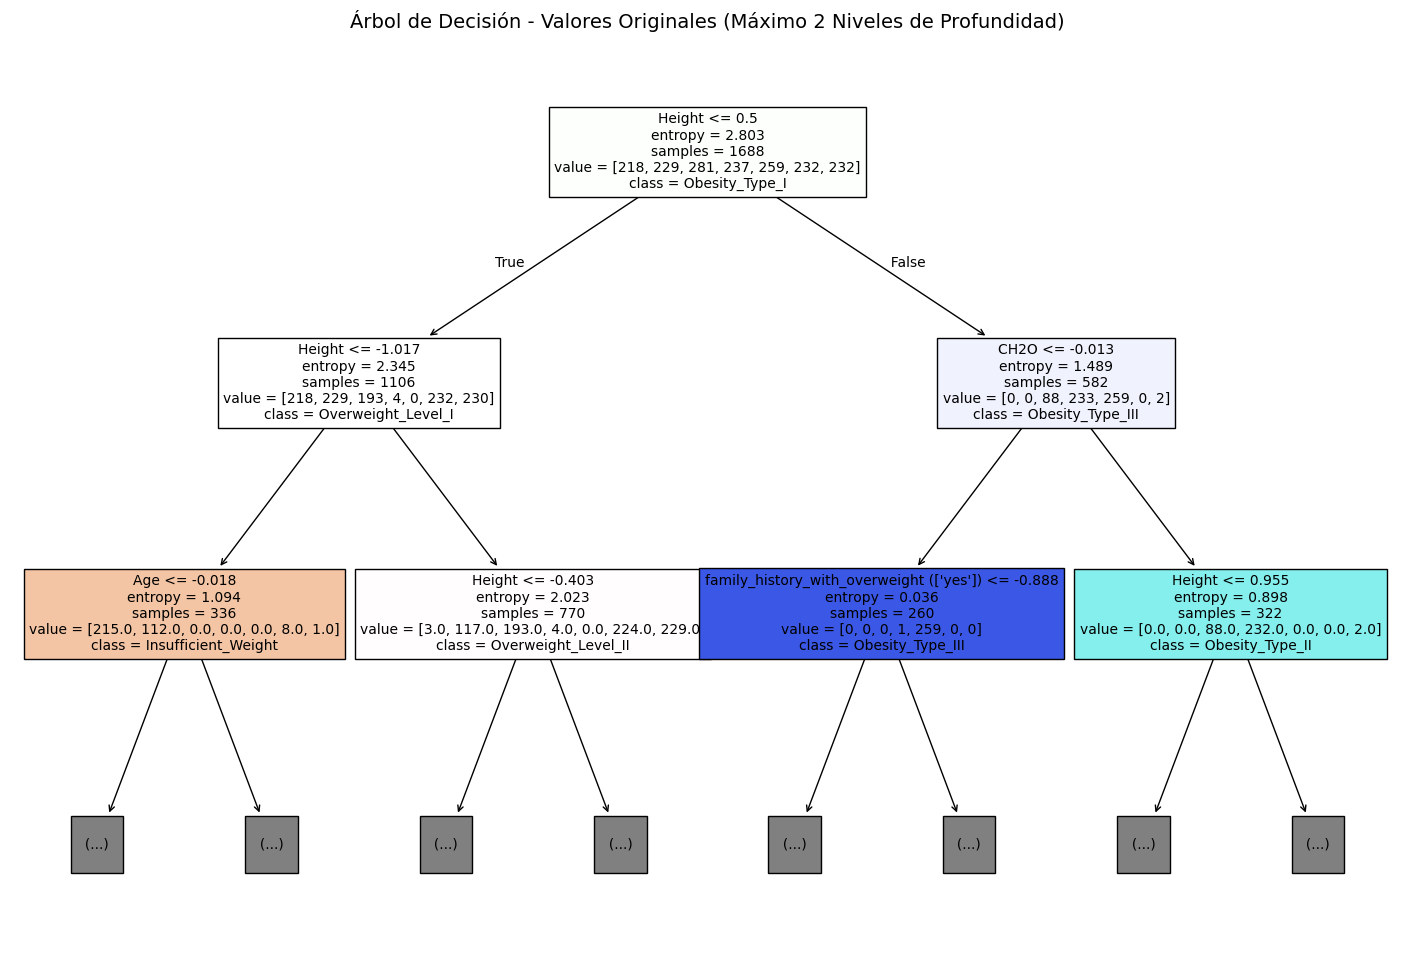

In [20]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import numpy as np

# Crear un diccionario con los nombres originales de las características
original_feature_names = list(df_X)  # Características originales antes del mapeo

for feature, mapping in feature_mappings.items():
    if feature in original_feature_names:
        # Sustituir los valores numéricos por los nombres originales
        original_feature_names[original_feature_names.index(feature)] = f"{feature} ({list(mapping.keys())})"

# Obtener los nombres de las clases antes del mapeo
original_class_names = [key for key in target_mapping.keys()]

# **Visualización del Árbol de Decisión con etiquetas originales, vamos a mostrar solo profundidad 2**
plt.figure(figsize=(18, 12))
plot_tree(
    modelo_dtc,
    filled=True,
    feature_names=original_feature_names,  # Usamos los nombres con valores originales
    class_names=original_class_names,  # Mostramos las clases originales
    max_depth=2,
    fontsize=10
)
plt.title("Árbol de Decisión - Valores Originales (Máximo 2 Niveles de Profundidad)", fontsize=14)
plt.show()
# Los valores están normalizados por lo que no se acaba de entender, pero sirve como ejemplo de representación

Vista general del dataset:
 - Número de muestras: 2111
 - Número de características: 19
 - Clases únicas: [0 1 2 3 4 5 6]


Resultados de búsqueda por rejilla y validación cruzada:
 - Mejores parámetros encontrados: {'criterion': 'log_loss', 'max_depth': 7, 'min_samples_split': 8}
 - Mejor precisión en validación cruzada: 0.9277

--- Evaluación para Clasificación ---
- Accuracy: 0.9433
- Precision: 0.9446
- Recall: 0.9433
- F1-score: 0.9436

Matriz de Confusión:


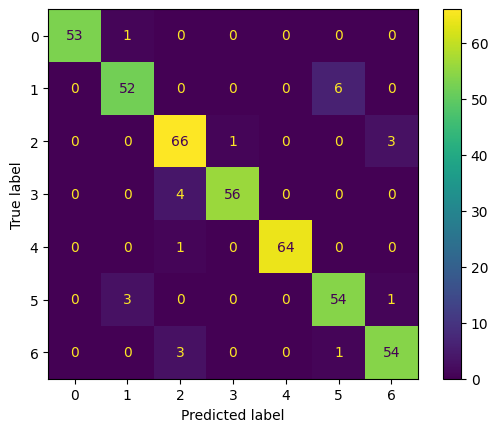

In [ ]:
modelo_dtc_leave_one_out = model_analysis(DecisionTreeClassifier(), rejilla, leave_one_out=True)



### Máquina de Vectores de Soporte
SVM es eficaz en espacios de alta dimensionalidad y busca un hiperplano que maximice la separación entre clases. Es robusto frente a outliers y útil para problemas donde las clases son separables.

**Hiperparámetros**

- C: Parámetro de regularización (valores probados: 0.1, 1, 10, 100).
- kernel: Tipo de núcleo a utilizar ('linear', 'rbf', 'sigmoid').
- gamma: Coeficiente del núcleo para ciertos tipos de kernel (valores probados: 0.01, 0.1, 0.2, 0.3).
- degree: Grado del polinomio para el kernel 'poly' (valores probados: 2, 3, 4).
- coef0: Término independiente en el kernel ('sigmoid' y 'poly') (valores probados: 0.1, 0.5, 1.0).

**Sesgo y Varianza**
- Sesgo: Una SVM con un kernel lineal puede tener alto sesgo si las clases no son linealmente separables. Kernels más complejos como 'rbf' o 'poly' reducen el sesgo.

- Varianza: Un C alto o un gamma alto pueden aumentar la varianza, haciendo el modelo sensible al ruido. Reducir estos parámetros o usar kernels más simples ayuda a controlar la varianza.

Vista general del dataset:
 - Número de muestras: 2111
 - Número de características: 19
 - Clases únicas: [0 1 2 3 4 5 6]


Resultados de búsqueda por rejilla y validación cruzada:
 - Mejores parámetros encontrados: {'model__C': 10, 'model__coef0': 0.1, 'model__degree': 2, 'model__gamma': 0.01, 'model__kernel': 'linear'}
 - Mejor precisión en validación cruzada: 0.9621

--- Evaluación para Clasificación ---
- Accuracy: 0.9598
- Precision: 0.9606
- Recall: 0.9598
- F1-score: 0.9597

Matriz de Confusión:


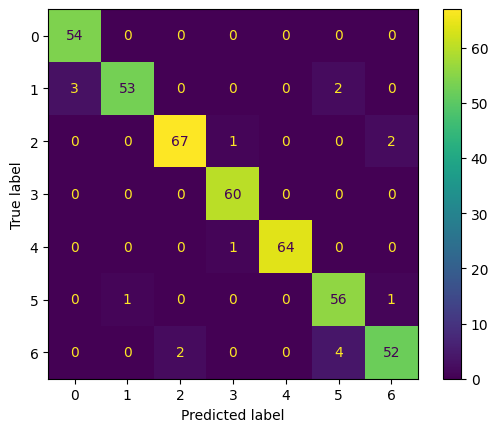

In [ ]:
from sklearn.svm import SVC
rejilla = {'model__C':[0.1,1,10,100], 'model__kernel':['linear','rbf','sigmoid'],'model__gamma':[0.01,0.1,0.2,0.3],'model__degree':[2,3,4],'model__coef0':[0.1,0.5,1.0]}


modelo_svc = model_analysis(SVC(), rejilla)


In [ ]:

modelo_svc = model_analysis(SVC(), rejilla, leave_one_out=True)


Vista general del dataset:
 - Número de muestras: 2111
 - Número de características: 19
 - Clases únicas: [0 1 2 3 4 5 6]



### Ensemble
Combinar múltiples modelos puede mejorar la precisión general. El clasificador de votación (Voting Classifier) agrega las predicciones de varios modelos base para tomar una decisión final, aprovechando las fortalezas individuales de cada modelo.

Vista general del dataset:
 - Número de muestras: 2111
 - Número de características: 19
 - Clases únicas: [0 1 2 3 4 5 6]


Resultados de búsqueda por rejilla y validación cruzada:
 - Mejores parámetros encontrados: {}
 - Mejor precisión en validación cruzada: 0.9656

--- Evaluación para Clasificación ---
- Accuracy: 0.9669
- Precision: 0.9671
- Recall: 0.9669
- F1-score: 0.9668

Matriz de Confusión:


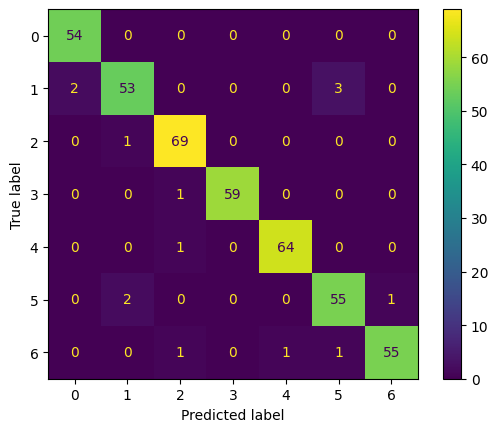

In [ ]:

from sklearn.ensemble import VotingClassifier


estimators = [
    ('dtc', modelo_dtc),
    ('knn', modelo_knn),
    ('svc', modelo_svc),
]

# Crea el clasificador de votación (Hard Voting)
voting_clf_hard = VotingClassifier(estimators=estimators, voting='hard')
hard_ensemble = model_analysis(voting_clf_hard, {})



Para hacer el clasificador de votacición soft todos los modelos tienen que poder generar probabilidades para cada clase con `predict_proba()`, pero SVC en scikit-learn no lo tiene activado por defecto. Se puede activar con `SVC(probability = true)` Ahora SVC en vez de calcular directamente las probabilidades, sigue un proceso adicional que involucra el método Platt Scaling, que es una técnica de calibración de probabilidades. Hace que el proceso sea mas lento.

Otra Opción más rápida para hacer un apaño es usar `CalibratedClassifierCV` para entrenar un SVM y calibrar sus probabilidades de manera más eficiente:


Vista general del dataset:
 - Número de muestras: 2111
 - Número de características: 19
 - Clases únicas: [0 1 2 3 4 5 6]


Resultados de búsqueda por rejilla y validación cruzada:
 - Mejores parámetros encontrados: {}
 - Mejor precisión en validación cruzada: 0.9727

--- Evaluación para Clasificación ---
- Accuracy: 0.9693
- Precision: 0.9696
- Recall: 0.9693
- F1-score: 0.9689

Matriz de Confusión:


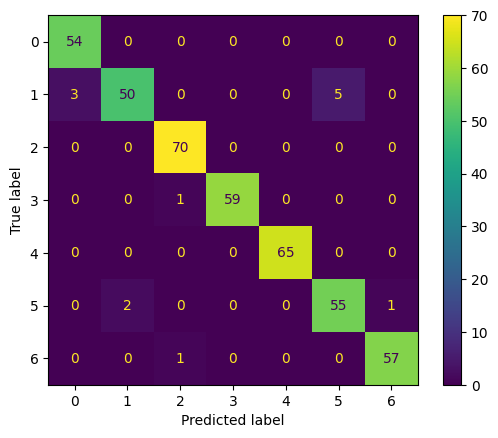

In [ ]:
from sklearn.calibration import CalibratedClassifierCV

# rejilla = {'C':[0.1,1,10,100], 'kernel':['linear','rbf','sigmoid'],'gamma':[0.01,0.1,0.2,0.3],'degree':[2,3,4],'coef0':[0.1,0.5,1.0]}
# modelo_svc_probability_true = model_analysis(probability=True), rejilla


# Envolverlo en CalibratedClassifierCV (usa validación cruzada para calibrar probabilidades)
modelo_svc_calibrated = CalibratedClassifierCV(modelo_svc, method='sigmoid')
estimators = [
    ('dtc', modelo_dtc),
    ('knn', modelo_knn),
    ('svc', modelo_svc_calibrated),
]

# Crea el clasificador de votación (Soft Voting)
voting_clf_soft = VotingClassifier(estimators=estimators, voting='soft')
soft_ensemble = model_analysis(voting_clf_soft, {})


### Explicación de métricas


#### Accuracy


Mide el porcentaje de predicciones correctas sobre el total de casos. Es útil cuando las clases están **balanceadas**, pero puede ser engañosa si hay un desbalance de clases.

- **Bueno cuando las clases están equilibradas.**  
- **Engañoso si hay muchas más muestras de una clase que de otra.**  

---

#### Precision



Indica cuántas de las instancias predichas como positivas **realmente lo son**. Es útil cuando **los falsos positivos son costosos** (ej. en detección de spam).

- **Importante cuando los falsos positivos deben evitarse (ej. diagnóstico médico, fraudes).**  
- **Puede ser alta aunque el modelo no detecte bien los positivos.**  

---
#### Recall

Mide cuántas de las instancias **positivas reales fueron correctamente detectadas**. Es útil cuando los **falsos negativos son costosos** (ej. detección de cáncer).

- **Crítico cuando los falsos negativos son peligrosos (ej. fallos de seguridad, enfermedades graves).**  
- **Puede ser alta si el modelo clasifica demasiados casos como positivos.**  


---
#### F1-score (Equilibrio entre Precisión y Recall)

Es el **promedio armónico** entre **Precision y Recall**, lo que lo hace útil cuando queremos un balance entre ambos.

-  **Ideal cuando hay desbalance de clases y necesitamos equilibrar precisión**
-  **Menos intuitivo que Accuracy.**  

---


### Comparación de métricas de los modelos probados

#### Sin usar  Leave one out
</table>
<table>
  <tr>
      <th> Modelo</th>
      <th> Accuracy</th>
      <th> Precision </th>
      <th> Recall </th>
      <th> F1 Score </th>
  </tr>
  <tr>
    <td> DecisionTreeClassifier</td>
    <td>0.9409 </td>
    <td>0.9421 </td>
    <td>0.9409 </td>
    <td>0.9411 </td>
  </tr>

  <tr>
    <td> KNeighborsClassifier </td>
    <td>0.8818 </td>
    <td>0.8806 </td>
    <td>0.8818 </td>
    <td>0.8802 </td>
  </tr>


  <tr>
    <td> SVC  🥉 </td>
    <td> 0.9598 </td>
    <td>0.9606 </td>
    <td>0.9598 </td>
    <td>0.9597 </td>
  </tr>


</table>

#### Usando Leave one out
<table>
  <tr>
     <th> Modelo</th>
      <th> Accuracy</th>
      <th> Precision </th>
      <th> Recall </th>
      <th> F1 Score </th>
  </tr>
  
  <tr>
    <td> DecisionTreeClassifier </td>
    <td>0.9409 </td>
    <td>0.9425 </td>
    <td>0.9409 </td>
    <td>0.9413 </td>
  </tr>

  <tr>
    <td> KNeighborsClassifier </td>
    <td> 0.8629 </td>
    <td>0.8611 </td>
    <td>0.8629 </td>
    <td>0.8610 </td>
  </tr>

  <tr>
    <td> SVC </td>
    <td colspan="4">Tarda demasiado tiempo. ⏰ </td>
  </tr>

</table>

#### Ensemble
<table>
  <tr>
    <th>Modo de votación</th>
    <th>Accuracy </th>
    <th> Precision </th>
    <th> Recall </th>
    <th> F1 Score </th>
  </tr>
  <tr>
    <td>Hard voting 🥈</td>
    <td> 0.9669 </td>
    <td> 0.9671 </td>
    <td> 0.9669 </td>
    <td> 0.9668 </td>
  </tr>
   <tr>
    <td>Soft voting 🥇</td>
    <td> 0.9716  </td>
    <td> 0.9721 </td>
    <td> 0.9716 </td>
    <td> 0.9715 </td>
  </tr>

  
</table>


---

###  Conclusión
En este estudio se evaluaron tres modelos de clasificación: Árboles de Decisión, K-Nearest Neighbors (KNN) y Máquina de Vectores de Soporte (SVC), tanto de forma individual como combinados en un Ensemble con hard y soft voting. Además, se compararon las métricas obtenidas con y sin la técnica Leave One Out.


- SVC obtuvo el mejor rendimiento individual sin Leave One Out, alcanzando un Accuracy de 0.9598, pero no fue viable con Leave One Out debido al tiempo de procesamiento.

- Árboles de Decisión mostraron un rendimiento consistente en ambos escenarios, con una Accuracy de 0.9409, demostrando ser una opción equilibrada entre rendimiento y tiempo de cómputo.

- KNN tuvo un rendimiento inferior en comparación con los otros modelos, con una Accuracy de 0.8818 sin Leave One Out y 0.8629 con Leave One Out, indicando mayor sensibilidad al cambio de datos de entrenamiento.

- El Soft Voting fue el mejor método, con una Accuracy de 0.9716, superando a cualquier modelo individual.

- El Hard Voting también mostró un rendimiento sólido (0.9669), aunque ligeramente inferior al método suave.

Para terminar, el Ensemble con Soft Voting es la mejor estrategia para maximizar la precisión y robustez del modelo, combinando las fortalezas de cada clasificador individual. Para escenarios donde el tiempo de cómputo es crítico, los Árboles de Decisión ofrecen un buen equilibrio.